# Пятнашки, поиск решение игры с помощью оценочной функции

## Работа со состояниями игры

In [1]:
import game_state.game_state_provider as game_state_provider
from game_state.game_state import print_game_states

Финальное состояние игры.

In [2]:
game_state_provider.get_final_game_state().print()

1 2 3
4 5 6
7 8 0


Случайное состояние игры, полученное путём совершения 1000 случайных перемещений из финального состояния.

In [3]:
game_state_provider.get_random_game_state(moves=1000).print()

5 0 8
4 1 3
2 6 7


Случайное состояние игры и новые состояния, полученные на основе исходного состояния.

In [4]:
game_state = game_state_provider.get_random_game_state()
print('Изначальное состояние:\n')
game_state.print()

next_game_states = game_state_provider.get_next_game_states(game_state)
print('\nНовые возможные состояния:\n')
print_game_states(next_game_states)

Изначальное состояние:

7 8 1
4 3 6
5 2 0

Новые возможные состояния:

1)
7 8 1
4 3 0
5 2 6

2)
7 8 1
4 3 6
5 0 2


## Оценочная функция

Оценка состояния игры вычисляется как `g * k_g + h * k_h`, где `k_g` и `k_h` - константы, `g` вычисляется как кол-во ячеек, стоящих не на своих местах, `h` вычисляется как кол-во ходов, совершённых для того, чтобы получить текущее состояние игры.

Чем меньше значение оценочной функции, тем перспективнее состояние игры.

``` python
def calculate_g_value(game_state):
    g = 0

    for i in range(rows):
        for j in range(columns):
            if game_state[i, j] != final_game_state[i, j]:
                g += 1

    return g


def calculate_h_value(game_state):
    h = game_state.moves
    return h


def calculate_evaluation_function_value(game_state, k_g, k_h):
    g, h = _calculate_g_value(game_state), _calculate_h_value(game_state)
    return g * k_g + k_h * h
```

## Поиск решения

In [5]:
from game_solution.game_solution_search import find_game_solution

Поиск решения для финального состояния игры с коэффициентами: `k_g = 1`, `k_h = 1`.

In [6]:
game_state = game_state_provider.get_final_game_state()
game_solution = find_game_solution(game_state, k_g=1, k_h=1, max_iterations=100000)

In [7]:
game_solution.print_results()

Изначальное состояние игры:
1 2 3
4 5 6
7 8 0

Всего рассмотрено состояний игры - 1.
Размер траектории решения - 1.
Эффективность поиска решения - 100.00%.


In [8]:
game_solution.print_trajectory()

Траектория решения:

1)
1 2 3
4 5 6
7 8 0


Поиск решения для случайного состояния игры с коэффициентами: `k_g = 10, k_h = 1`.

In [9]:
game_state = game_state_provider.get_random_game_state(moves=1000)
game_solution = find_game_solution(game_state, k_g=10, k_h=1, max_iterations=100000)

In [10]:
game_solution.print_results()

Изначальное состояние игры:
7 3 6
5 1 4
0 2 8

Всего рассмотрено состояний игры - 446.
Размер траектории решения - 25.
Эффективность поиска решения - 5.61%.


In [11]:
game_solution.print_trajectory()

Траектория решения:

1)
7 3 6
5 1 4
0 2 8

2)
7 3 6
5 1 4
2 0 8

3)
7 3 6
5 1 4
2 8 0

4)
7 3 6
5 1 0
2 8 4

5)
7 3 0
5 1 6
2 8 4

6)
7 0 3
5 1 6
2 8 4

7)
7 1 3
5 0 6
2 8 4

8)
7 1 3
0 5 6
2 8 4

9)
7 1 3
2 5 6
0 8 4

10)
7 1 3
2 5 6
8 0 4

11)
7 1 3
2 0 6
8 5 4

12)
7 1 3
0 2 6
8 5 4

13)
0 1 3
7 2 6
8 5 4

14)
1 0 3
7 2 6
8 5 4

15)
1 2 3
7 0 6
8 5 4

16)
1 2 3
7 5 6
8 0 4

17)
1 2 3
7 5 6
8 4 0

18)
1 2 3
7 5 0
8 4 6

19)
1 2 3
7 0 5
8 4 6

20)
1 2 3
7 4 5
8 0 6

21)
1 2 3
7 4 5
0 8 6

22)
1 2 3
0 4 5
7 8 6

23)
1 2 3
4 0 5
7 8 6

24)
1 2 3
4 5 0
7 8 6

25)
1 2 3
4 5 6
7 8 0


Поиск решения для случайного некорректного состояния игры с коэффициентами: `k_g = 1, k_h = 1` и с малым ограничением в максимальное число итераций поиска: `max_iterations = 100`.

In [12]:
game_state = game_state_provider.get_incorrect_random_game_state(moves=1000)
game_solution = find_game_solution(game_state, k_g=1, k_h=1, max_iterations=100)

In [13]:
game_solution.print_results()

Изначальное состояние игры:
3 1 7
0 8 5
2 6 4

Решение не было найдено.
Причина: "Превышено максимально число рассмотренных состояний игры".
Всего рассмотрено состояний игры - 171.


In [14]:
game_solution.print_trajectory()

Траектория решения отсутствует.


Поиск решения для случайного некорректного состояния игры с коэффициентами: `k_g = 1, k_h = 10` и с большим ограничением в максимальное число итераций поиска: `max_iterations = 1000000`.

In [15]:
game_state = game_state_provider.get_incorrect_random_game_state(moves=1000)
game_solution = find_game_solution(game_state, k_g=1, k_h=10, max_iterations=1000000)

In [16]:
game_solution.print_results()

Изначальное состояние игры:
1 0 4
5 3 8
2 7 6

Решение не было найдено.
Причина: "Рассмотрены все возможные состояния игры".
Всего рассмотрено состояний игры - 181440.


In [17]:
game_solution.print_trajectory()

Траектория решения отсутствует.


## Визуализация дерева

Построим дерево, описывающее поиск решения, для состояния игры из документа.

In [18]:
from game_state.game_state import GameState
from game_solution.game_solution_visualization import draw_tree

In [19]:
values = [
    [2, 4, 3],
    [1, 8, 5],
    [7, 0, 6]
]

game_state = GameState(values)
game_solution = find_game_solution(game_state, k_g=1, k_h=1, max_iterations=100000)

In [20]:
game_solution.print_results()

Изначальное состояние игры:
2 4 3
1 8 5
7 0 6

Всего рассмотрено состояний игры - 21.
Размер траектории решения - 8.
Эффективность поиска решения - 38.10%.


In [21]:
game_solution.print_trajectory()

Траектория решения:

1)
2 4 3
1 8 5
7 0 6

2)
2 4 3
1 0 5
7 8 6

3)
2 0 3
1 4 5
7 8 6

4)
0 2 3
1 4 5
7 8 6

5)
1 2 3
0 4 5
7 8 6

6)
1 2 3
4 0 5
7 8 6

7)
1 2 3
4 5 0
7 8 6

8)
1 2 3
4 5 6
7 8 0


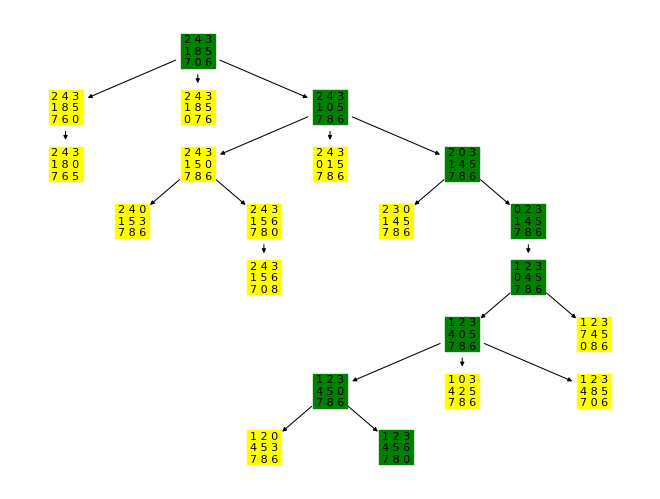

In [22]:
draw_tree(game_solution, node_size=600, font_size=8, width=0.75, arrow_size=6)